In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

F = float(input('Modal (F) = '))
N = int(input('Masa Hidup Obligasi (N) = '))
m = int(input('Frekuensi Pembayaran Kupon (m) = '))
j = float(input('Tingkat Suku Bunga per Periode (j) = '))
r = float(input('Tingkat Kupon Tiap Periode (r) = '))

C = F
n = N*m
g = r*F/C
v = 1/(1+j)

def interest(k):
 return C*g-C*(g-j)*v**(n-k+1)

def principal(k):
 return C*g-interest(k)

def balance(k):
 return C*(g-j)*((1-v**(n-k))/j)+C

periode = []
kupon = []
I_t = []
P_t = []
B_t = []
totalkupon0 = 0
for k in range(n+1):
  if k == 0:
    xkupon = 0
    xI_t = 0
    xP_t = 0
  else:
    xkupon = C*g
    xI_t = interest(k)
    xP_t = principal(k)
  xB_t = balance(k)
  periode.append(k)
  kupon.append(xkupon)
  I_t.append(xI_t)
  P_t.append(xP_t)
  B_t.append(xB_t)
  totalkupon = totalkupon0 + xkupon
  totalkupon0 = totalkupon
amortisasi_bond = {'Periode':periode,'Kupon':kupon,'Bunga yang Dibayarkan':I_t,'Pokok Pinjaman yang Dibayarkan':P_t,'Pokok Pinjaman':B_t}
df = pd.DataFrame(amortisasi_bond)
print('\n',df,'\n')
# df.to_excel (r'Tabel Amortisasi Obligasi.xlsx', index = False, header=True)

Modal (F) = 100000000
Masa Hidup Obligasi (N) = 20
Frekuensi Pembayaran Kupon (m) = 4
Tingkat Suku Bunga per Periode (j) = 0.4
Tingkat Kupon Tiap Periode (r) = 0.3

     Periode       Kupon  Bunga yang Dibayarkan  \
0         0         0.0           0.000000e+00   
1         1  30000000.0           3.000000e+07   
2         2  30000000.0           3.000000e+07   
3         3  30000000.0           3.000000e+07   
4         4  30000000.0           3.000000e+07   
..      ...         ...                    ...   
76       76  30000000.0           3.185934e+07   
77       77  30000000.0           3.260308e+07   
78       78  30000000.0           3.364431e+07   
79       79  30000000.0           3.510204e+07   
80       80  30000000.0           3.714286e+07   

    Pokok Pinjaman yang Dibayarkan  Pokok Pinjaman  
0                     0.000000e+00    7.500000e+07  
1                    -2.040714e-05    7.500000e+07  
2                    -2.856925e-05    7.500000e+07  
3                    

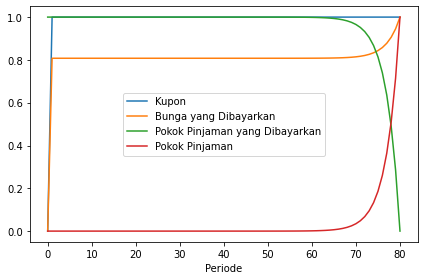

In [12]:
# VISUALISASI

data = df.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_data = scaler.fit_transform(data)
rescaled_kupon = rescaled_data[:,1]
rescaled_I_t = rescaled_data[:,2]
rescaled_P_t = rescaled_data[:,3]
rescaled_B_t = rescaled_data[:,4]

plt.plot(periode, rescaled_kupon)
plt.plot(periode, rescaled_I_t)
plt.plot(periode, rescaled_P_t)
plt.plot(periode, rescaled_B_t)
plt.xlabel('Periode')
plt.legend(['Kupon', 'Bunga yang Dibayarkan', 'Pokok Pinjaman yang Dibayarkan', 'Pokok Pinjaman'])
plt.tight_layout()
plt.show()

In [14]:
# PERHITUNGAN KEUNTUNGAN

keuntungan_modal = abs(balance(0) - balance(n))
keuntungan_kupon = totalkupon
totalhasil_invest = balance(0) + totalkupon
keunhasil_invest = totalhasil_invest - C
print('Keuntungan Modal = ',keuntungan_modal)
print('Keuntungan Kupon = ',keuntungan_kupon)
print('Total Hasil Investasi = ',totalhasil_invest)
print('Keuntungan Hasil Investasi = ',keunhasil_invest)

Keuntungan Modal =  24999999.999948993
Keuntungan Kupon =  2400000000.0
Total Hasil Investasi =  2475000000.000051
Keuntungan Hasil Investasi =  2375000000.000051
